<div id= "table-of-contents" style= "font-size: 22px; font-weight: bold">Table of Contents</div>

<p style= "font-size: 16px">1. <a href= "#prologue" style= "text-decoration: none; font-size: 16px">Prologue</a><p/>
<p style= "font-size: 16px">2. <a href= "#import-libraries" style= "text-decoration: none; font-size: 16px">Importing Libraries</a><p/>
<p style= "font-size: 16px">3. <a href= "#eda" style= "text-decoration: none; font-size: 16px">Exploratory Data Analysis</a><p/>
<p style= "font-size: 16px">4. <a href= "#model-engineering" style= "text-decoration: none; font-size: 16px">Modeling and Feature Engineering</a><p/>
<p style= "font-size: 16px">5. <a href= "#conclusion" style= "text-decoration: none; font-size: 16px">Conclusion and Future Work</a><p/>
<p style= "font-size: 16px">6. <a href= "#reference" style= "text-decoration: none; font-size: 16px">Reference</a><p/>

<div id= "prologue" style= "font-size: 22px; font-weight: bold">Prologue</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

<p style= "font-size: 16px">In the world of data-driven decision-making, the art of predictive modeling has become an invaluable tool for businesses seeking to optimize their strategies. Among the many challenges they face, insurance companies grapple with identifying potential customers for their offerings, such as vehicle insurance. With a plethora of features ranging from age to region codes, this journey delves into the intricacies of predictive modeling. Along the way, techniques like feature engineering, interaction, aggregation, and hyperparameter tuning are explored to maximize model performance.</p> 
<p style= "font-size: 18px; font-weight: bold">Dataset: Health Insurance Cross Sell Prediction</p>
<p style= "font-size: 16px">The dataset is a rich source for exploring the relationships between these factors and customer interest in vehicle insurance. Data scientists engage in exploratory data analysis (EDA), feature engineering, and predictive modeling to build a model that can accurately forecast customer intent. <br>
As the insurance industry increasingly embraces data-driven decision-making, this dataset offers a practical and intriguing case study, showcasing the intersection of data science and insurance. It serves as a compelling example of how predictive analytics can enhance business strategies and customer outreach in this evolving landscape.</p> 
<p style= "font-size: 16px">You can access the dataset <a href="https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data?select=train.csv"> here</a>.</p>

<div id= "import-libraries" style= "font-size: 22px; font-weight: bold">Importing Libraries</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

<div id= "eda" style= "font-size: 22px; font-weight: bold">Exploratory Data Analysis</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [7]:
for i in train_df.columns:
    n = train_df[i].nunique()
    if n > 1:
        print(f"{i} has {n} unique values")
    else:
        print(f"{i} has 1 unique value")

id has 381109 unique values
Gender has 2 unique values
Age has 66 unique values
Driving_License has 2 unique values
Region_Code has 53 unique values
Previously_Insured has 2 unique values
Vehicle_Age has 3 unique values
Vehicle_Damage has 2 unique values
Annual_Premium has 48838 unique values
Policy_Sales_Channel has 155 unique values
Vintage has 290 unique values
Response has 2 unique values


This dataset consists of 381109 entries, indexed from 0 to 381108, no missing values.

Data columns (total 12 columns):
- id: A unique ID for the customer, which serves as a identifier for each customer in the dataset.

- Gender: The gender of the customer, typically categorized as 'Male' or 'Female'.

- Age: The age of the customer, representing the customer's age in years.

- Driving_License: A binary variable indicating whether the customer has a driving license. It is coded as 0 for customers without a driving license and 1 for customers with a driving license.

- Region_Code: A unique code representing the region of the customer. Each code corresponds to a specific geographic region.

- Previously_Insured: A binary variable indicating whether the customer already has vehicle insurance. It is coded as 1 for customers who already have vehicle insurance and 0 for customers who do not have vehicle insurance.

- Vehicle_Age: The age of the customer's vehicle. It is usually categorized into groups, such as '< 1 Year', '1-2 Years', and '> 2 Years'.

- Vehicle_Damage: A binary variable indicating whether the customer's vehicle has been damaged in the past. It is coded as 1 if the customer's vehicle has been damaged and 0 if it has not been damaged.

- Annual_Premium: The amount that the customer needs to pay as a premium for vehicle insurance coverage in a year.

- Policy_Sales_Channel: An anonymized code that represents the channel or method used to reach out to the customer for insurance sales. This may include different agents, mail, phone calls, in-person visits, and other methods.

- Vintage: The number of days the customer has been associated with the insurance company. This column measures the length of the customer's relationship with the company.

- Response: The target variable you want to predict. It is a binary variable where 1 indicates that the customer is interested in vehicle insurance, and 0 indicates that the customer is not interested.

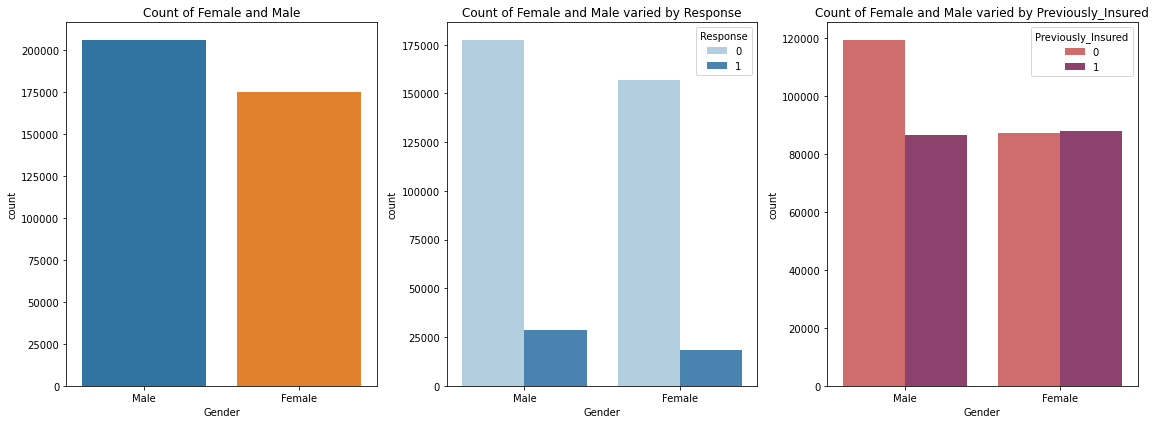

In [8]:
plt.figure(figsize= (16, 6))
plt.subplot(1,3,1)
sns.countplot(x = train_df['Gender'])
plt.title('Count of Female and Male')
plt.subplot(1,3,2)
sns.countplot(data = train_df, x = 'Gender', hue= 'Response', palette= 'Blues')
plt.title('Count of Female and Male varied by Response')
plt.subplot(1,3,3)
sns.countplot(data = train_df, x = 'Gender', hue= 'Previously_Insured', palette= 'flare')
plt.title('Count of Female and Male varied by Previously_Insured')
plt.tight_layout()

In [80]:
df = pd.read_csv('train.csv')

- The distribution of Gender is almost equal
- It appears that males have a higher response rate (13.8%) compared to females (10.4%). This suggests that the likelihood of a positive response may be higher among males in the given dataset.

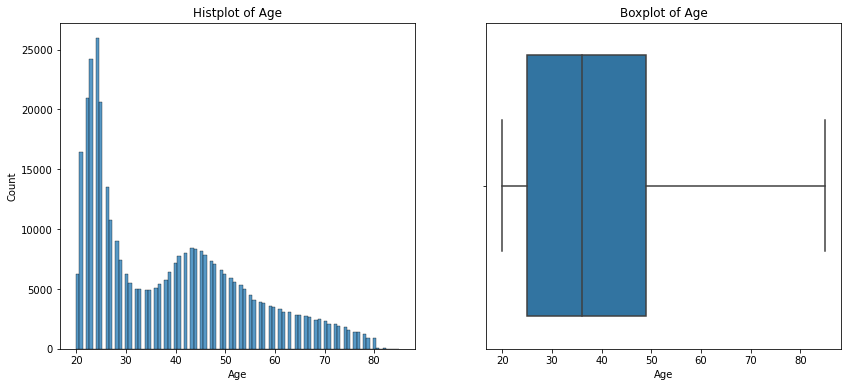

In [9]:
plt.figure(figsize= (14, 6))
plt.subplot(1,2,1)
sns.histplot(train_df['Age'])
plt.title('Histplot of Age')
plt.subplot(1,2,2)
sns.boxplot(x= train_df['Age'])
plt.title('Boxplot of Age');

From the above charts, we can divide Age into 3 age ranges as young (20-35), middle-aged (36-55), senior (56-85). This information is really helpful for feature engineering.

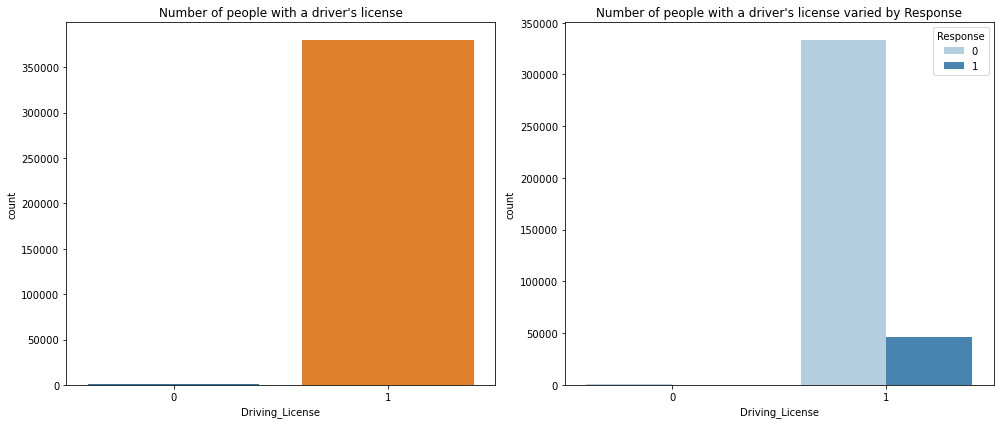

In [10]:
plt.figure(figsize= (14, 6))
plt.subplot(1,2,1)
sns.countplot(x = train_df['Driving_License'])
plt.title("Number of people with a driver's license")
plt.subplot(1,2,2)
sns.countplot(data= train_df, x = 'Driving_License', hue= 'Response', palette= 'Blues')
plt.title("Number of people with a driver's license varied by Response")
plt.tight_layout()

Most people have a driver's license. 

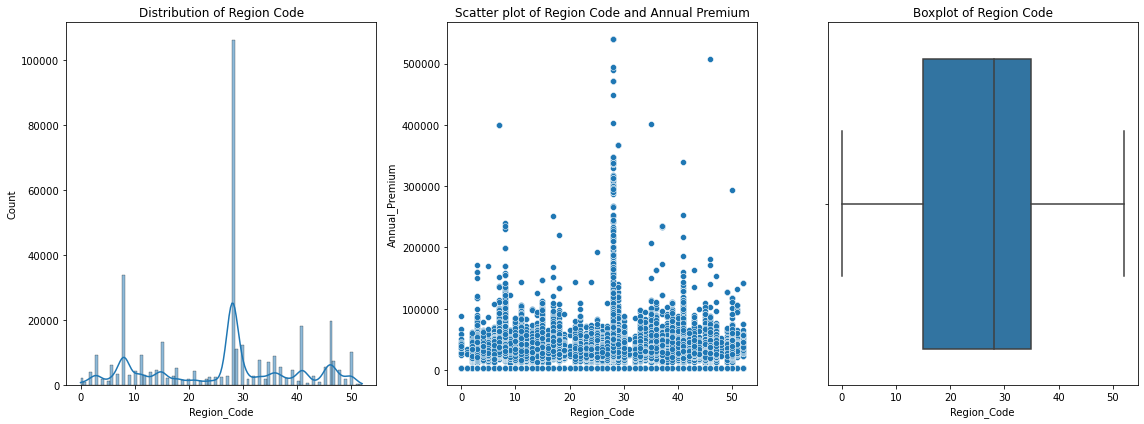

In [11]:
plt.figure(figsize= (16, 6))
plt.subplot(1,3,1)
sns.histplot(x = train_df['Region_Code'], kde= True)
plt.title('Distribution of Region Code')
plt.subplot(1,3,2)
sns.scatterplot(data= train_df, x = 'Region_Code', y= 'Annual_Premium', palette= 'Blues')
plt.title('Scatter plot of Region Code and Annual Premium')
plt.subplot(1,3,3)
sns.boxplot(x= train_df['Region_Code'])
plt.title('Boxplot of Region Code')
plt.tight_layout()

Region 28 has the most customer and the highest paid as premium. 

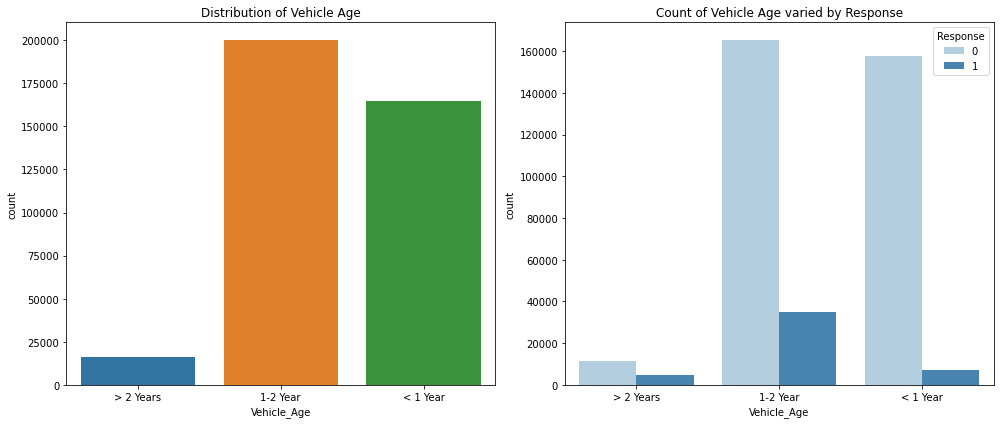

In [12]:
plt.figure(figsize= (14, 6))
plt.subplot(1,2,1)
sns.countplot(x= train_df['Vehicle_Age'])
plt.title('Distribution of Vehicle Age')
plt.subplot(1,2,2)
sns.countplot(data= train_df, x= 'Vehicle_Age', hue= 'Response', palette= 'Blues')
plt.title('Count of Vehicle Age varied by Response')
plt.tight_layout()

- The number of customers have 1-2 year Vehicle is the highest. 
- The likelihood of interest in auto insurance is also overwhelmingly high.

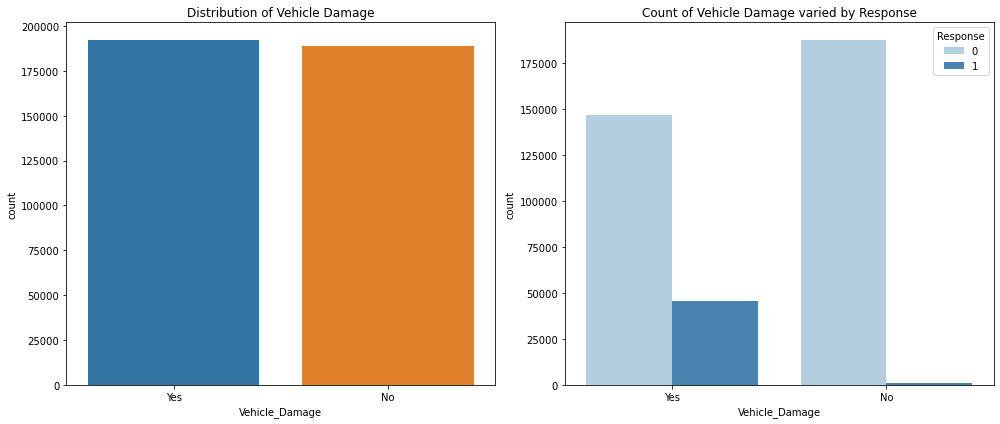

In [13]:
plt.figure(figsize= (14, 6))
plt.subplot(1,2,1)
sns.countplot(x= train_df['Vehicle_Damage'])
plt.title('Distribution of Vehicle Damage')
plt.subplot(1,2,2)
sns.countplot(data= train_df, x= 'Vehicle_Damage', hue= 'Response', palette= 'Blues')
plt.title('Count of Vehicle Damage varied by Response')
plt.tight_layout()

Most people whose vehicles have broken down in the past are likely interested in auto insurance.

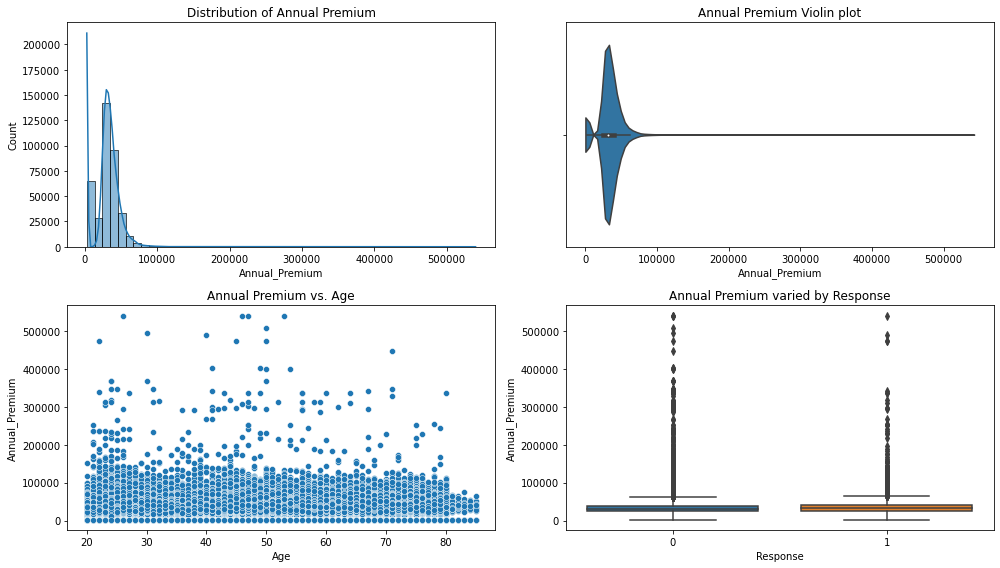

In [14]:
plt.figure(figsize= (14, 8))
plt.subplot(2,2,1)
sns.histplot(data=train_df, x="Annual_Premium", bins=50, kde=True)
plt.title('Distribution of Annual Premium')
plt.subplot(2,2,2)
sns.violinplot(x= train_df['Annual_Premium'])
plt.title('Annual Premium Violin plot')
plt.subplot(2,2,3)
sns.scatterplot(data=train_df, x="Age", y="Annual_Premium")
plt.title('Annual Premium vs. Age')
plt.subplot(2,2,4)
sns.boxplot(data=train_df, x="Response", y="Annual_Premium")
plt.title('Annual Premium varied by Response')
plt.tight_layout()

- The annual premimum variable is right skewed
- From the boxplot we can observe lot of outliers in the variable. But we won't remove outliers.
- The distribution between Annual premium and age is balance. We can use this for later feature engineering. 

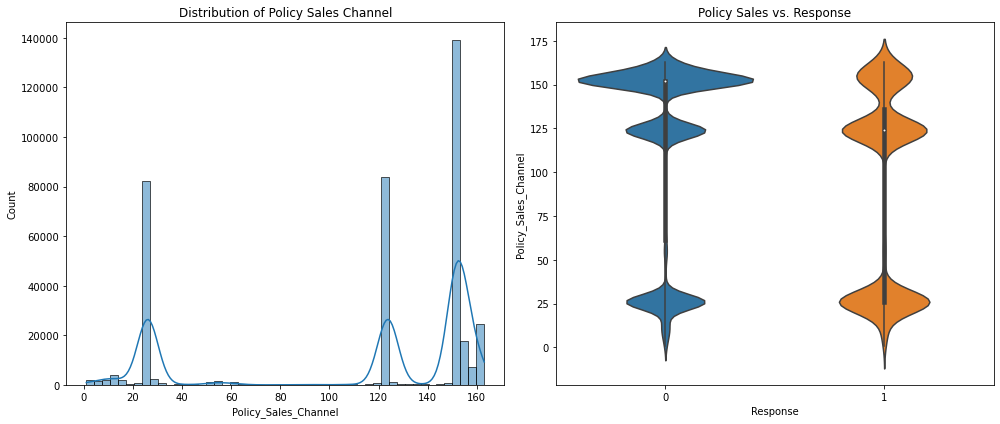

In [15]:
plt.figure(figsize= (14, 6))
plt.subplot(1,2,1)
sns.histplot(x= train_df['Policy_Sales_Channel'], bins= 50, kde = True)
plt.title('Distribution of Policy Sales Channel')
plt.subplot(1,2,2)
sns.violinplot(data= train_df, x= 'Response', y= 'Policy_Sales_Channel')
plt.title('Policy Sales vs. Response')
plt.tight_layout()

Different marketing approaches have yielded quite satisfactory results (25, 125)

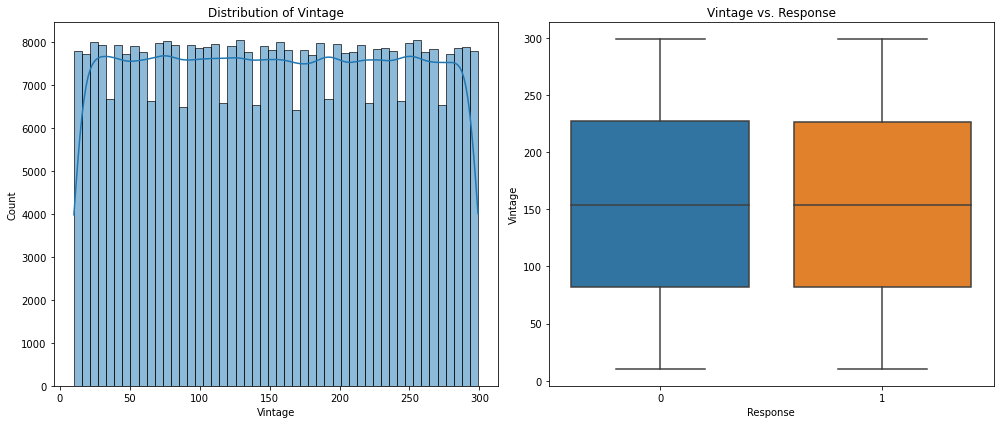

In [16]:
plt.figure(figsize= (14, 6))
plt.subplot(1,2,1)
sns.histplot(x= train_df['Vintage'], bins= 50, kde = True)
plt.title('Distribution of Vintage')
plt.subplot(1,2,2)
sns.boxplot(data= train_df, x= 'Response', y= 'Vintage')
plt.title('Vintage vs. Response')
plt.tight_layout()

The response rate to vintage is very balanced. It mays help alot during modeling.

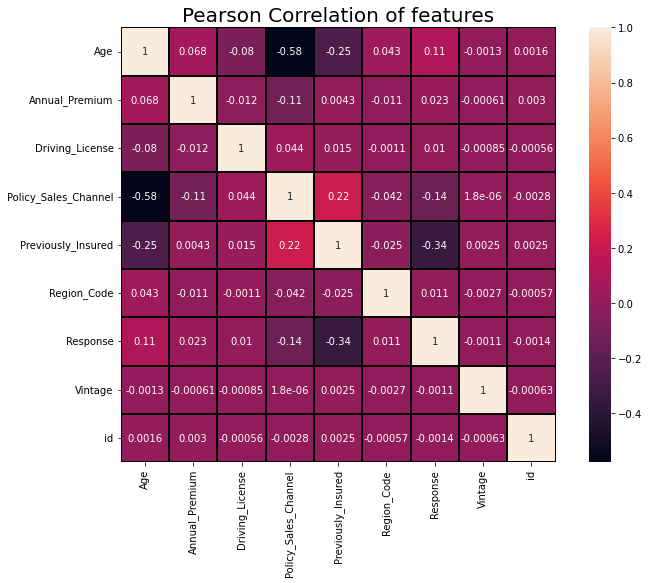

In [17]:
str_list = [] 
for colname, colvalue in train_df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)         
num_list = train_df.columns.difference(str_list) 
house_num = train_df[num_list]
f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation of features', fontsize = 20)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='k', annot=True);

- Age and Response: There is a positive correlation of approximately 0.111 between "Age" and "Response," which suggests that older customers may be more likely to be interested in vehicle insurance.

- Previously_Insured and Response: There is a negative correlation of approximately -0.341 between "Previously_Insured" and "Response," indicating that customers who already have vehicle insurance (Previously_Insured=1) are less likely to be interested in additional insurance.

- Policy_Sales_Channel and Response: There is a negative correlation of approximately -0.139 between "Policy_Sales_Channel" and "Response," which suggests that the choice of policy sales channel may influence customer interest in insurance.

- Age and Policy_Sales_Channel: There is a negative correlation of approximately -0.578 between "Age" and "Policy_Sales_Channel." This may indicate that different sales channels are used for different age groups of customers.

- Age and Annual_Premium: There is a positive correlation of approximately 0.068 between "Age" and "Annual_Premium." This suggests that older customers may pay higher annual premiums.

- Annual_Premium and Response: There is a positive but weak correlation of approximately 0.023 between "Annual_Premium" and "Response." This suggests that higher annual premiums may have a slight positive influence on customer interest.

<div id= "model-engineering" style= "font-size: 22px; font-weight: bold">Modeling and Feature Engineering</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

In [18]:
cate_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
train_df = pd.get_dummies(train_df, columns= cate_cols, drop_first = True)
train_df = train_df.drop('id', axis= 1)
train_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [19]:
X1 = train_df.drop('Response', axis=1)
y1 = train_df['Response']

In [20]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
def modeling(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    rf_classifier = model
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    y_score = rf_classifier.predict_proba(X_test)[:, 1]    
    roc_auc = roc_auc_score(y_test, y_score)
    return roc_auc

In [21]:
modeling(X1, y1, model)

0.7952563123883657

In [22]:
train_1 = train_df.copy()
ss = StandardScaler()
train_1[['Age', 'Vintage']] = ss.fit_transform(train_1[['Age', 'Vintage']])
mm = MinMaxScaler()
train_1[['Annual_Premium']] = mm.fit_transform(train_1[['Annual_Premium']])
train_1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,1,0,1,1
1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,1,0,0,0
2,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,1,0,1,1
3,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,1,0,0
4,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,0,1,0,0


In [23]:
X2 = train_1.drop('Response', axis=1)
y2 = train_1['Response']
model1 = RandomForestClassifier(n_estimators=10, random_state=42)
modeling(X2, y2, model1)

0.7951273560790271

In [24]:
train_2 = train_df.copy()
bins_age = [20, 35, 55, 85]
labels_age = ["young", "middle-aged", "senior"]
train_2['Age_Group'] = pd.cut(train_2['Age'], bins=bins_age, labels=labels_age, right=False)

bins_annual = [2630, 24405, 39400, 540165]
labels_annual = ['Low Premium', 'Medium Premium', 'High Premium']
train_2['Annual_Premium_Group'] = pd.cut(train_2['Annual_Premium'], bins=bins_annual, labels=labels_annual, right= False)

train_2 = pd.get_dummies(train_2, columns=['Age_Group', 'Annual_Premium_Group'])
train_2.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Group_young,Age_Group_middle-aged,Age_Group_senior,Annual_Premium_Group_Low Premium,Annual_Premium_Group_Medium Premium,Annual_Premium_Group_High Premium
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0,1,0,0,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0,0,1,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0,1,0,0,1,0
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,1,0,0,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0,0,0,1,0


In [25]:
X3 = train_2.drop('Response', axis=1)
y3 = train_2['Response']
model2 = RandomForestClassifier(n_estimators=10, random_state=42)
modeling(X3, y3, model2)

0.7919602816989554

In [26]:
model2_1 = RandomForestClassifier(n_estimators=100, random_state=42)
modeling(X3, y3, model2_1)

0.8363339036277904

In [27]:
train_3 = train_df.copy()
train_3['Age_Annual_Pre'] = train_3['Age']*train_3['Annual_Premium']
train_3.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Annual_Pre
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,1779976.0
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,2548736.0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,1799818.0
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,600999.0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,797384.0


In [28]:
X4 = train_3.drop('Response', axis=1)
y4 = train_3['Response']
model3 = RandomForestClassifier(n_estimators=10, random_state=42)
modeling(X4, y4, model3)

0.7952429789592933

In [29]:
train_3_1 = train_2.copy()
train_3_1['Age_Annual_Pre'] = train_3['Age']*train_3['Annual_Premium']
train_3_1.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Group_young,Age_Group_middle-aged,Age_Group_senior,Annual_Premium_Group_Low Premium,Annual_Premium_Group_Medium Premium,Annual_Premium_Group_High Premium,Age_Annual_Pre
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0,1,0,0,0,1,1779976.0
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0,0,1,0,1,0,2548736.0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0,1,0,0,1,0,1799818.0
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,1,0,0,0,1,0,600999.0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0,0,0,1,0,797384.0


In [30]:
X5 = train_3_1.drop('Response', axis=1)
y5 = train_3_1['Response']
model3_1 = RandomForestClassifier(n_estimators=100, random_state=42)
modeling(X5, y5, model3_1)

0.8353321590966069

In [31]:
train_4 = train_2.copy()
train_4['Age_Annual_div'] = train_4['Annual_Premium'] / train_4['Age']
train_4.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Group_young,Age_Group_middle-aged,Age_Group_senior,Annual_Premium_Group_Low Premium,Annual_Premium_Group_Medium Premium,Annual_Premium_Group_High Premium,Age_Annual_div
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0,1,0,0,0,1,919.409091
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0,0,1,0,1,0,441.263158
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0,1,0,0,1,0,814.765957
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,1,0,0,0,1,0,1362.809524
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0,0,0,1,0,948.137931


In [32]:
X6 = train_4.drop('Response', axis=1)
y6 = train_4['Response']
model4 = RandomForestClassifier(n_estimators=100, random_state=42)
modeling(X6, y6, model4)

0.8352733059584735

In [33]:
train_5 = train_2.copy()
mean_response_by_region = train_df.groupby('Region_Code')['Response'].mean()
train_5['Region_Code_Encoded'] = train_5['Region_Code'].map(mean_response_by_region)
train_5.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Group_young,Age_Group_middle-aged,Age_Group_senior,Annual_Premium_Group_Low Premium,Annual_Premium_Group_Medium Premium,Annual_Premium_Group_High Premium,Region_Code_Encoded
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0,1,0,0,0,1,0.187163
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0,0,1,0,1,0,0.127662
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0,1,0,0,1,0,0.187163
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,1,0,0,0,1,0,0.112760
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,1,0,0,0,1,0,0.121776


In [34]:
X7 = train_5.drop('Response', axis=1)
y7 = train_5['Response']
model5 = RandomForestClassifier(n_estimators=100, random_state=42)
modeling(X7, y7, model5)

0.8358361948774015

In [47]:
train_6 = train_df.copy()

mean_response_by_region = train_6.groupby('Region_Code')['Response'].mean()
train_6['Region_Code_Encoded'] = train_6['Region_Code'].map(mean_response_by_region)

average_premium_by_region = train_6.groupby('Region_Code')['Annual_Premium'].mean()
train_6['Average_Premium_By_Region'] = train_6['Region_Code'].map(average_premium_by_region)
train_6.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_Encoded,Average_Premium_By_Region
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0.187163,38668.865245
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0.127662,24524.480813
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0.187163,38668.865245
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,0.112760,27607.283146
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,0.121776,30949.127471


In [48]:
X8 = train_6.drop('Response', axis=1)
y8 = train_6['Response']
model6 = RandomForestClassifier(n_estimators=100, random_state=42)
modeling(X8, y8, model6)

0.8360917854306285

In [52]:
def feature_selection(X, model):
    feature_importances = model.feature_importances_
    feature_names = X.columns
    sorted_idx = feature_importances.argsort()[::-1]
    print("Feature ranking:")
    for i in range(X.shape[1]):
        print(f"{i+1}. Feature {feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]}")
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.show()

Feature ranking:
1. Feature Vintage: 0.279712170422303
2. Feature Annual_Premium: 0.250130965121702
3. Feature Age: 0.1622063682662501
4. Feature Vehicle_Damage_Yes: 0.07203526529851326
5. Feature Policy_Sales_Channel: 0.07078402842464813
6. Feature Previously_Insured: 0.049631767701676786
7. Feature Region_Code_Encoded: 0.027934426322305497
8. Feature Average_Premium_By_Region: 0.02603094428238153
9. Feature Region_Code: 0.024539550985828787
10. Feature Vehicle_Age_< 1 Year: 0.016142135718947098
11. Feature Gender_Male: 0.01416309318613449
12. Feature Vehicle_Age_> 2 Years: 0.006090323591453028
13. Feature Driving_License: 0.0005989606778563938


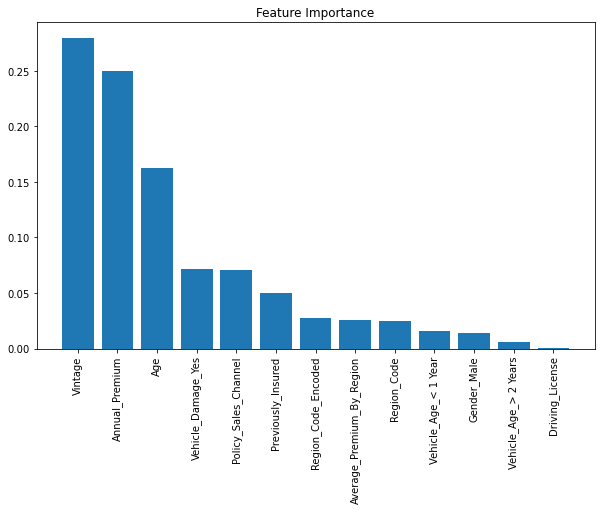

In [54]:
feature_selection(X8, model6)

In [57]:
train_7 = train_6.copy()
train_7['Age_Annual_Pre'] = train_7['Age']*train_7['Annual_Premium']
train_7['Age_Annual_div'] = train_7['Annual_Premium'] / train_7['Age']
train_7.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_Encoded,Average_Premium_By_Region,Age_Annual_Pre,Age_Annual_div
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0.187163,38668.865245,1779976.0,919.409091
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0.127662,24524.480813,2548736.0,441.263158
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0.187163,38668.865245,1799818.0,814.765957
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,0.112760,27607.283146,600999.0,1362.809524
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,0.121776,30949.127471,797384.0,948.137931


In [58]:
X9 = train_7.drop('Response', axis=1)
y9 = train_7['Response']
model7 = RandomForestClassifier(n_estimators=100, random_state=42)
modeling(X9, y9, model7)

0.8372286794634642

In [59]:
model7_1 = RandomForestClassifier(n_estimators=200, random_state=42)
modeling(X9, y9, model7_1)

0.8388374102748543

Feature ranking:
1. Feature Vintage: 0.1815870169731547
2. Feature Age_Annual_div: 0.14124300894057015
3. Feature Age_Annual_Pre: 0.14026419229924125
4. Feature Annual_Premium: 0.12455522902897063
5. Feature Age: 0.09276006500066991
6. Feature Vehicle_Damage_Yes: 0.0694311868083705
7. Feature Policy_Sales_Channel: 0.06444704106627029
8. Feature Previously_Insured: 0.05175315295954701
9. Feature Region_Code_Encoded: 0.03376667365597961
10. Feature Average_Premium_By_Region: 0.03200243398816927
11. Feature Region_Code: 0.030280513366722536
12. Feature Gender_Male: 0.01738953252475598
13. Feature Vehicle_Age_< 1 Year: 0.01314211498515007
14. Feature Vehicle_Age_> 2 Years: 0.00687324907599907
15. Feature Driving_License: 0.0005045893264288213


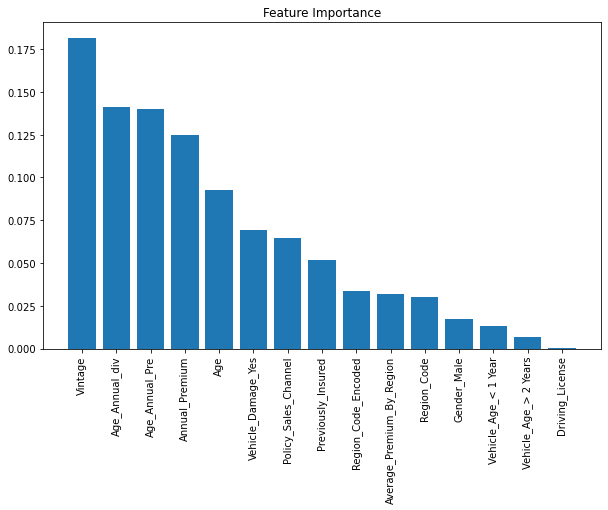

In [60]:
feature_selection(X9, model7_1)

In [64]:
X10 = train_7.drop(['Response', 'Driving_License'], axis=1)
y10 = train_7['Response']
model8 = RandomForestClassifier(n_estimators=200, random_state=42)
modeling(X10, y10, model8)

0.8383559091647282

In [83]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [200]}
X_train, X_test, y_train, y_test = train_test_split(X9, y9, test_size=0.25, random_state= 42)

clf = RandomForestClassifier(random_state= 42)
model_random = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 42, n_jobs = -1)
model_random.fit(X_train, y_train)
best_params = model_random.best_params_
print(best_params)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}


In [84]:
model9 = RandomForestClassifier(n_estimators=200, min_samples_split= 5, min_samples_leaf= 4,
                                max_depth= 10, criterion= 'gini', random_state=42)
modeling(X9, y9, model9)

0.8579567898275151

#### Random Forest Classifier (random_state= 42) (metric = ROC AUC)
- Base Model: The initial Random Forest model with n_estimators=10 achieved an ROC AUC score of 0.795.

- Feature Binning: Applying feature binning to "Age" and "Annual Premium" did not significantly improve the model's performance, with ROC AUC scores of 0.7919 for n_estimators=10 and 0.8363 for n_estimators=100.

- Feature Interaction: Adding feature interactions, such as multiplying "Age" and "Annual Premium" or dividing "Annual Premium" by "Age" did not result in a substantial improvement in ROC AUC.

- Feature Aggregation: Aggregating features, such as calculating the mean response and premium for each region, resulted in a ROC AUC score of 0.8358 for n_estimators=100.

- Combined Feature Interaction and Aggregation: Combining feature interaction (multiply and divide) with feature aggregation (mean response and premium) led to better results, with ROC AUC scores of 0.8372 for n_estimators=100 and 0.8388 for n_estimators=200.

- Feature Selection: Dropping the "Driving_License" feature after feature interaction and aggregation had a minimal impact on the ROC AUC score, resulting in a score of 0.8383 for n_estimators=200.

- Best Model with Hyperparameter Tuning: The best-performing model achieved an ROC AUC score of 0.8579 and was obtained using RandomizedSearchCV to find optimal hyperparameters while including feature interaction and aggregation.

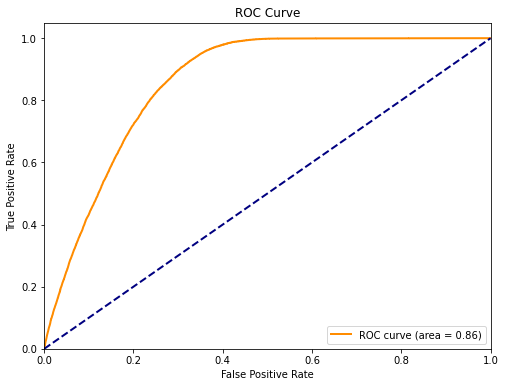

In [77]:
y_prob = model9.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<div id= "conclusion" style= "font-size: 22px; font-weight: bold">Conclusion and Future Work</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

### Conclusion
- The Health Insurance Cross Sell Prediction project has allowed us to embark on a journey through the intricate landscape of the insurance industry, where data-driven insights hold the key to optimizing strategies and maximizing revenue. We have explored a comprehensive dataset that encompasses customer demographics, insurance history, vehicle information, and policy details, with the ultimate goal of predicting customer interest in vehicle insurance.

- Through extensive exploratory data analysis (EDA), we gained a deeper understanding of the dataset's features and their relationships. We witnessed the power of feature engineering, including binning, interaction, and aggregation, in shaping our models' predictive performance. The Random Forest Classifier, with its ability to handle complex interactions and aggregations, emerged as a valuable tool for this predictive task.

- Our experimentation unveiled that the combination of feature interaction, aggregation, and hyperparameter tuning significantly improved the model's ability to forecast customer intent, ultimately resulting in a remarkable ROC AUC score of 0.8579.
### Future Work
Finishing this project, I will apply the model on test.csv and submit it on Kaggle. 

<div id= "reference" style= "font-size: 22px; font-weight: bold">Reference</div>

<a href= "#table-of-contents" style= "text-decoration: none; font-size: 14px">Back to Top</a>

[1] #Rank 10 solution cross sell prediction hackathon by ROSHAN KUMAR G: <a href="https://www.kaggle.com/code/roshankumarg/rank-10-solution-cross-sell-prediction-hackathon#Problem-statement-">Link</a>\
[2] Vehicle Insurance EDA and boosting models by YASHVI PATEL: <a href="https://www.kaggle.com/code/yashvi/vehicle-insurance-eda-and-boosting-models#Import-Libraries">Link</a>